# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [205]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans



## Load the Data

In [206]:
df = pd.read_csv('/content/dataest/Traffic_Accidents.csv')
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,475125.0,319380.0,-0.888006,52.766777,33,3.0,2,1.0,31/08/2012,6,...,6,6485,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2012
51996,456682.0,127058.0,-1.192915,51.040030,44,3.0,1,1.0,08/05/2013,4,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2013
51997,540510.0,152250.0,0.012032,51.252055,45,3.0,3,1.0,01/11/2011,3,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011
51998,434720.0,334000.0,-1.485264,52.902301,30,3.0,2,2.0,22/07/2011,6,...,5,81,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2011


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [207]:
df.describe(include='all')

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
count,52000.000000,5.200000e+04,52000.000000,52000.000000,52000.000000,51678.000000,52000.000000,50959.000000,52000,52000.000000,...,52000.000000,52000.000000,52000,52000,51456,52000,52000,51912.000000,52000,52000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3286,NaN,...,NaN,NaN,3,6,5,9,6,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,04/11/2005,NaN,...,NaN,NaN,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,Yes,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,NaN,...,NaN,NaN,51718,43368,37734,41662,35727,NaN,42143,NaN
mean,440284.256846,2.998617e+05,-1.427193,52.586684,30.401712,2.837145,1.834327,1.354756,NaN,4.130712,...,2.672673,384.503058,NaN,NaN,NaN,NaN,NaN,1.359397,NaN,2009.401788
std,95109.751221,1.613624e+05,1.398249,1.453049,25.545581,0.402582,0.727856,0.855220,NaN,1.926217,...,3.205080,1304.989395,NaN,NaN,NaN,NaN,NaN,0.479868,NaN,3.006997
min,98480.000000,1.903000e+04,-6.895268,50.026153,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2005.000000
25%,375540.000000,1.780100e+05,-2.366190,51.487676,7.000000,3.000000,1.000000,1.000000,NaN,2.000000,...,-1.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2006.000000
50%,440950.000000,2.671800e+05,-1.391202,52.295042,30.000000,3.000000,2.000000,1.000000,NaN,4.000000,...,3.000000,0.000000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,2010.000000
75%,523500.000000,3.981492e+05,-0.214666,53.478016,46.000000,3.000000,2.000000,1.000000,NaN,6.000000,...,6.000000,0.000000,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,2012.000000


In [208]:
df.duplicated().sum()

43

In [209]:
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [211]:
df.shape

(52000, 26)

In [212]:
df.isna().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,322
Number_of_Vehicles,0
Number_of_Casualties,1041
Date,0
Day_of_Week,0


Location_Easting_OSGR:
Location_Northing_OSGR:
Longitude:
Latitude:
Police_Force:
Accident_Severity:
Number_of_Vehicles:
Number_of_Casualties:
Date:
Day_of_Week:
Speed_limit:
Weather_Conditions:
Road_Surface_Conditions:
Urban_or_Rural_Area:
Year:


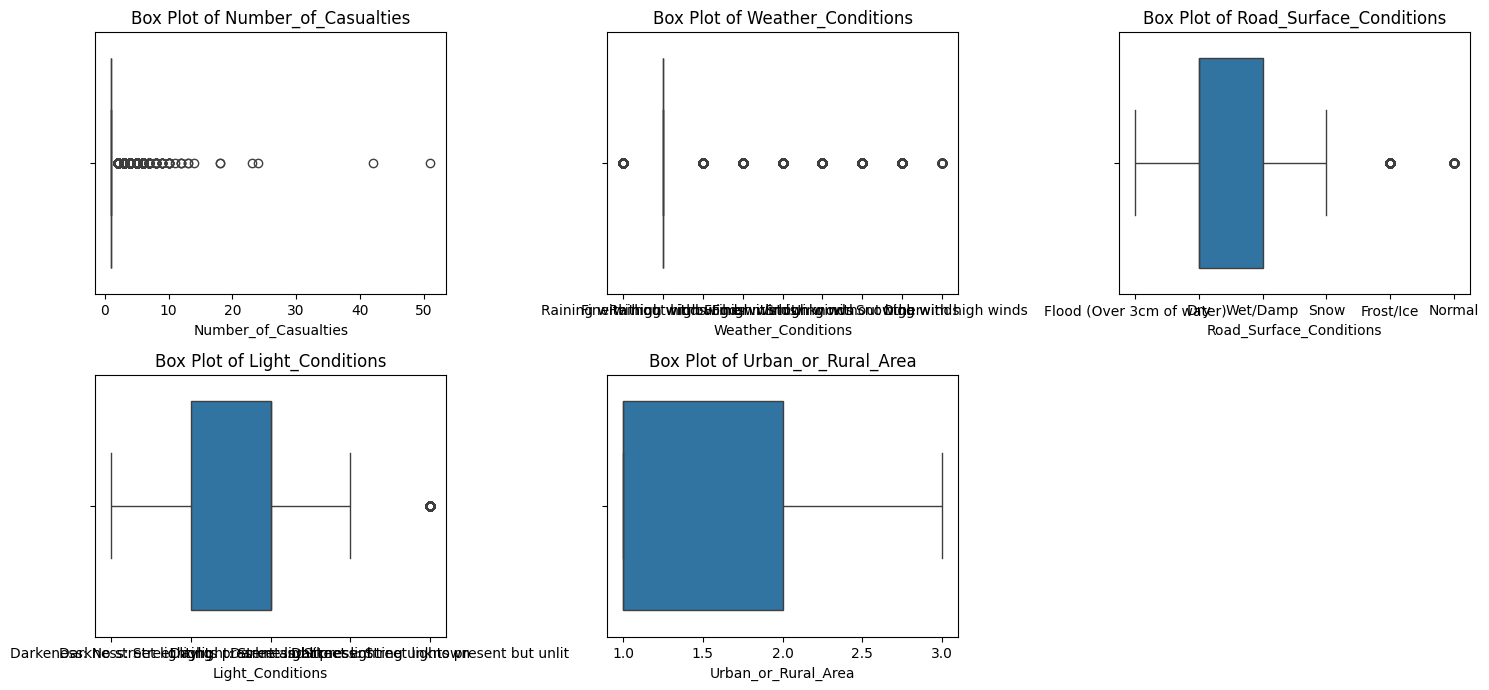

In [213]:
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
sns.boxplot(x=df['Number_of_Casualties'])
plt.title('Box Plot of Number_of_Casualties')

plt.subplot(3, 3, 2)
sns.boxplot(x=df['Weather_Conditions'])
plt.title('Box Plot of Weather_Conditions')

plt.subplot(3, 3, 3)
sns.boxplot(x=df['Road_Surface_Conditions'])
plt.title('Box Plot of Road_Surface_Conditions')

plt.subplot(3, 3, 4)
sns.boxplot(x=df['Light_Conditions'])
plt.title('Box Plot of Light_Conditions')

plt.subplot(3, 3, 5)
sns.boxplot(x=df['Urban_or_Rural_Area'])
plt.title('Box Plot of Urban_or_Rural_Area')


plt.tight_layout()
plt.show()

In [214]:
def remove_outlier(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outlier(df,'Number_of_Casualties')

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [215]:
df.dropna(inplace=True)

<ipython-input-215-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [216]:
# df.fillna(df.median(numeric_only=True), inplace=True)

# df.fillna(df.mode().iloc[0], inplace=True)

In [217]:
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
X = df[numerical_features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [218]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

In [219]:
pca_df

,PC1,PC2
0,-0.667853,3.863289
1,-2.344255,-0.728975
2,1.375776,-0.852449
3,0.471423,-2.454919
4,0.576255,-2.651246
...,...,...
38320,1.477442,2.282829
38321,-0.596989,-1.170199
38322,0.102764,2.946334
38323,-1.410553,0.311384


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [220]:
features = [
    'Latitude', 'Longitude', 'Accident_Severity', 'Number_of_Vehicles',
    'Number_of_Casualties', 'Weather_Conditions', 'Road_Surface_Conditions',
    'Light_Conditions', 'Urban_or_Rural_Area'
]

df_selected = df[features]

df_encoded = pd.get_dummies(df_selected, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

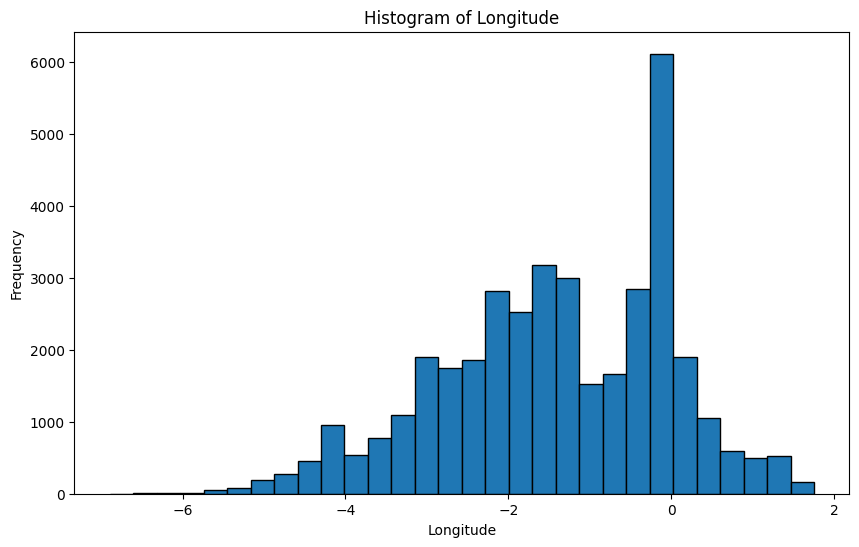

In [221]:
plt.figure(figsize=(10, 6))
plt.hist(df['Longitude'].dropna(), bins=30, edgecolor='k')
plt.title('Histogram of Longitude')
plt.xlabel('Longitude')
plt.ylabel('Frequency')
plt.show()

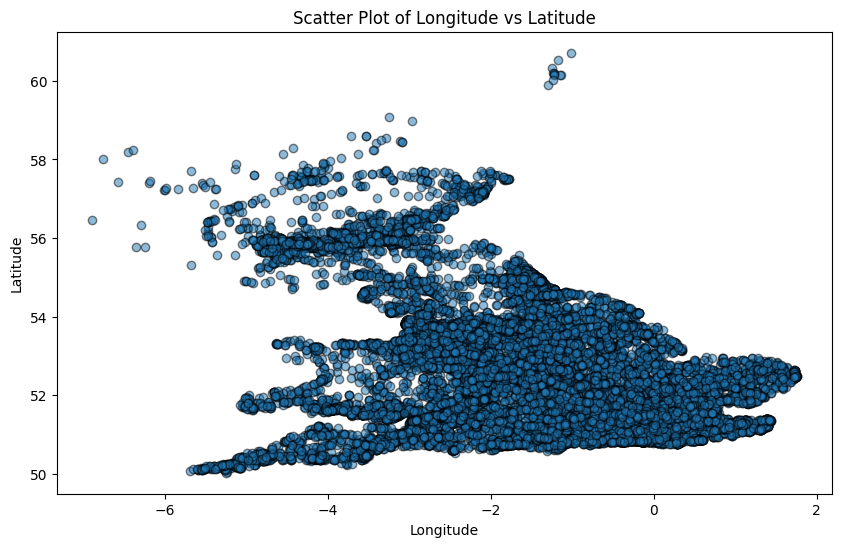

In [222]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5, edgecolor='k')
plt.title('Scatter Plot of Longitude vs Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

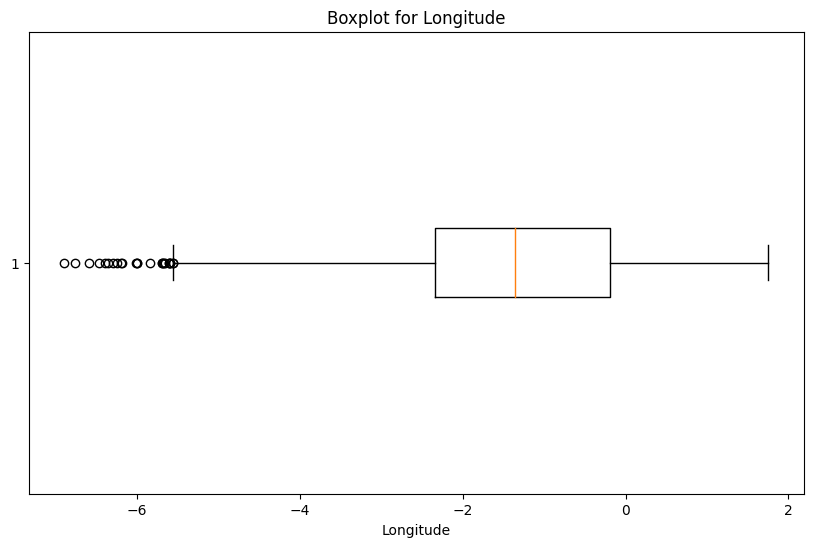

In [223]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Longitude'].dropna(), vert=False)
plt.title('Boxplot for Longitude')
plt.xlabel('Longitude')
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [224]:
df_selected = df[features]
df_encoded = pd.get_dummies(df_selected, drop_first=True)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

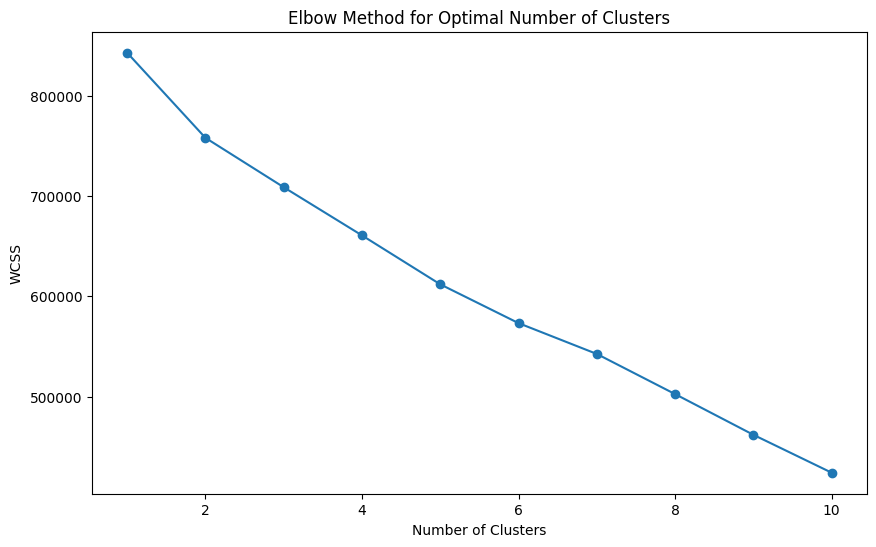

In [233]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [226]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [227]:
from sklearn.cluster import KMeans



## Evaluation
Evaluate the clustering result using appropriate metrics.


## Plot the data points with their predicted cluster center

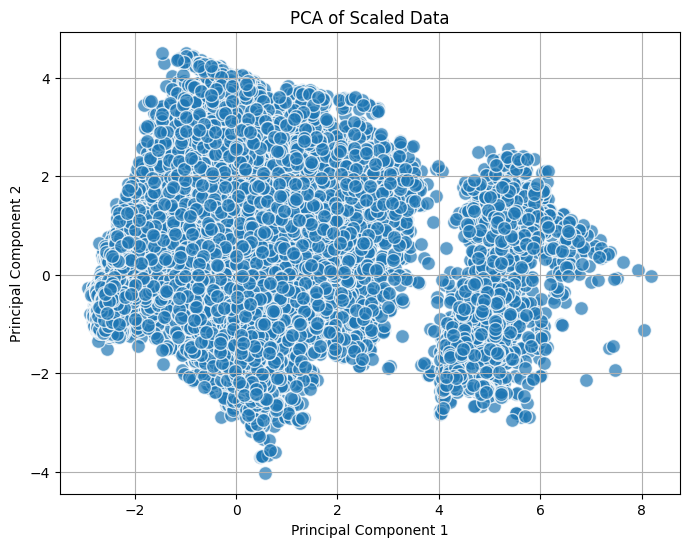

In [228]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7, edgecolors='w', s=100)
plt.title('PCA of Scaled Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


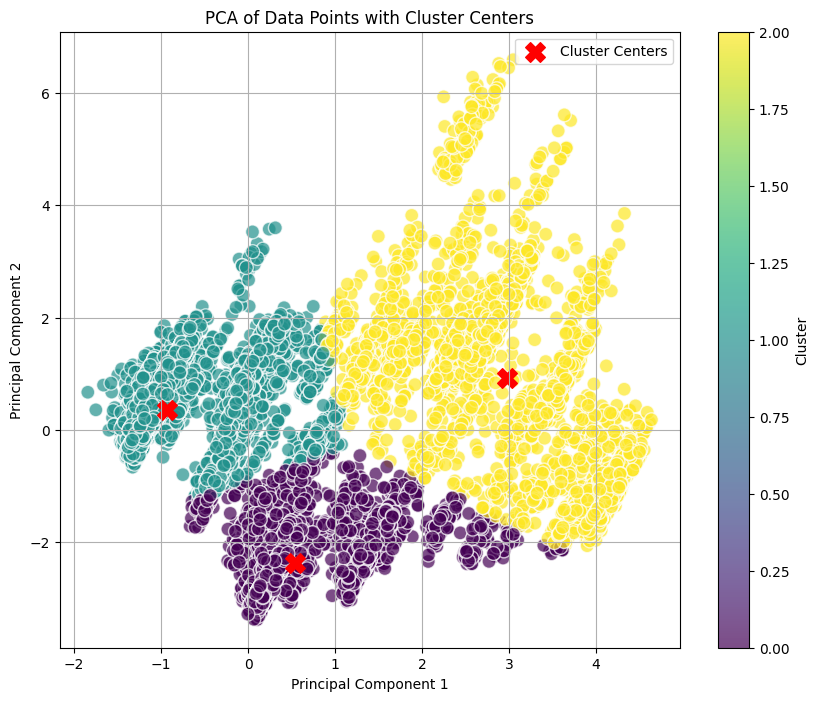

In [232]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
clusters = kmeans.fit_predict(pca_result)
cluster_centers = kmeans.cluster_centers_

pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', s=100, alpha=0.7, edgecolors='w')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('PCA of Data Points with Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?

  1. Latitude and Longitude: Essential for spatial clustering to group accidents by location.
	2.	Accident_Severity: Helps in identifying patterns related to the impact of accidents.
	3.	Number_of_Vehicles and Number_of_Casualties: Indicate the scale and consequences of accidents.
	4.	Weather_Conditions: Affects accident rates and severity, revealing patterns influenced by weather.
	5.	Road_Surface_Conditions: Influences accident occurrences and severity based on road conditions.
	6.	Light_Conditions: Affects safety and clustering based on different lighting scenarios.
	7.	Urban_or_Rural_Area: Differentiates between accidents in urban vs. rural settings.
  
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
   1.  I chose 3 Clusters by elbow method.
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   1.  I Apply K-Means clustering
     Why?
     The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares so after see my data i chess KMeans
  


   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

# My Answer
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?

  1. Latitude and Longitude: Essential for spatial clustering to group accidents by location.
	2.	Accident_Severity: Helps in identifying patterns related to the impact of accidents.
	3.	Number_of_Vehicles and Number_of_Casualties: Indicate the scale and consequences of accidents.
	4.	Weather_Conditions: Affects accident rates and severity, revealing patterns influenced by weather.
	5.	Road_Surface_Conditions: Influences accident occurrences and severity based on road conditions.
	6.	Light_Conditions: Affects safety and clustering based on different lighting scenarios.
	7.	Urban_or_Rural_Area: Differentiates between accidents in urban vs. rural settings.
  
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
   1.  I chose 3 Clusters by elbow method.
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   1.  I Apply K-Means clustering
     Why?
     The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares so after see my data i chess KMeans
  
